Khuzaima Tofeeq
20L-1304
BS DS- 5A2

Importing Necessary Libraries

In [1]:
#Importing Necessary Libraries used for Data Wrangling and Visualization and charts/plots.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer

In [17]:
#Reading excel file in pandas DataFrame
df1=pd.read_excel('my_iris.xlsx')

In [18]:
#Printing head of our dataframe to analyze rows and attributes.
df1.head(5)

,Unnamed: 0,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,0,NaN,NaN,NaN,NaN,10.2,-7.0,5.6,-0.8,Iris-setosa
1,1,4.9,3.0,1.4,0.2,9.8,-6.0,5.6,-0.8,Iris-setosa
2,2,4.7,3.2,NaN,NaN,9.4,-6.4,5.2,-0.8,Iris-setosa
3,3,4.6,NaN,1.5,NaN,9.2,-6.2,6.0,-0.8,Iris-setosa
4,4,NaN,3.6,NaN,NaN,10.0,-7.2,5.6,-0.8,Iris-setosa


Dropping First Column and Plotting Nan Values on a Bar Plot

<AxesSubplot:>

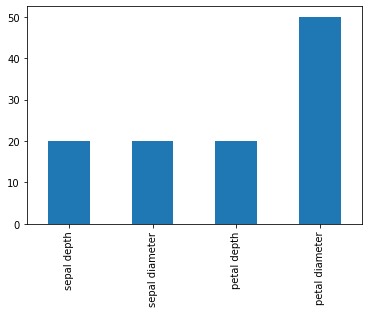

In [4]:
#Dropping the first column which is named as "Unnamed: 0 because it just contains the row indexes."
df1.drop('Unnamed: 0',axis=1,inplace=True)

#Visualizing NaN Values on a bar plot
df1.isna().sum()[df1.isna().sum()>0].plot(kind='bar')

In [5]:
#Copying our original DataFrame into another as we are going to perform data wrangling techniques.
df2=df1.copy(deep=True)



Performing Imputation using Mean strategy as numeric columns contain Nan Values

In [6]:
#Doing imputation on the specific columns containing Nan Values.
#Will be using the strategy of mean as we have missing values only in numeric attributes.
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df2['sepal depth']=imp.fit_transform(df2['sepal depth'].values.reshape(-1,1))[:,0]
df2['sepal diameter']=imp.fit_transform(df2['sepal diameter'].values.reshape(-1,1))[:,0]
df2['petal depth']=imp.fit_transform(df2['petal depth'].values.reshape(-1,1))[:,0]
df2['petal diameter']=imp.fit_transform(df2['petal diameter'].values.reshape(-1,1))[:,0]




No NaN values remain

<AxesSubplot:>

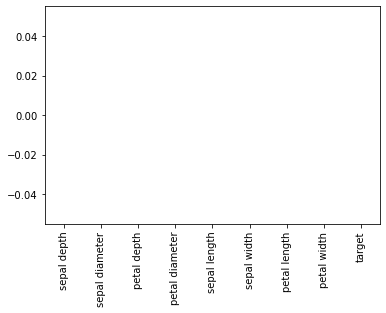

In [7]:
#Plotting Nan Values on a bar plot to show that no Nan values remain.
df2.isna().sum().plot(kind='bar')

HeatMap of Correlation Matrix

<AxesSubplot:>

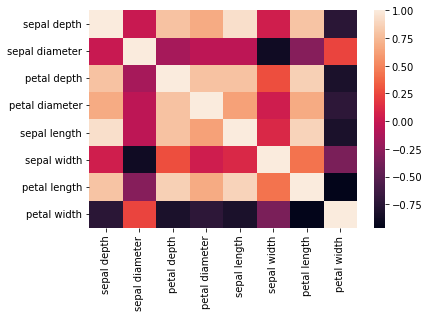

In [8]:
# Plotting correlation between all attributes on a heatmap.
sns.heatmap(df2.corr())

Correlation Matrix

In [9]:
#Correlation Matrix of our DataFrame showing the correlation between all attributes.
corr=df2.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\tofee\AppData\Local\Temp\ipykernel_3472\3552661095.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width
sepal depth,1.000,0.011,0.788,0.670,0.938,0.044,0.796,-0.743
sepal diameter,0.011,1.000,-0.154,-0.046,-0.046,-0.880,-0.302,0.238
petal depth,0.788,-0.154,1.000,0.790,0.786,0.273,0.855,-0.819
petal diameter,0.670,-0.046,0.790,1.000,0.629,0.040,0.675,-0.732
sepal length,0.938,-0.046,0.786,0.629,1.000,0.109,0.872,-0.818
sepal width,0.044,-0.880,0.273,0.040,0.109,1.000,0.421,-0.357
petal length,0.796,-0.302,0.855,0.675,0.872,0.421,1.000,-0.963
petal width,-0.743,0.238,-0.819,-0.732,-0.818,-0.357,-0.963,1.000


Dropping Columns having Correlation > 0.5 or < 0.5, will be using Upper Triangular as main purpose is to ignore diagonal.

In [10]:
#Making a seperate DataFrame for absolute correlation values.
corr_matrix = df2.corr().abs()

#As on the diagonal we will be having values of perfect 1, so we have to ignore them and chose values above
# the diagonal or below. We will be using the upper triangular matrix.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#Columns to be dropped having corr > 0.5 or <-0.5 as stored in this list.
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
to_drop2=[column for column in upper.columns if any(upper[column] < -0.5)]

#Printing the columns to be dropped.
print(to_drop)
print(to_drop2)

#Dropping the columns.
df2.drop(to_drop, axis=1, inplace=True)
df2.drop(to_drop2,axis=1,inplace=True)

['petal depth', 'petal diameter', 'sepal length', 'sepal width', 'petal length', 'petal width']
[]


Correlation of columns that remain.

In [11]:
#Printing the columns that remain.
corr=df2.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\tofee\AppData\Local\Temp\ipykernel_3472\71595591.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


,sepal depth,sepal diameter
sepal depth,1.000,0.011
sepal diameter,0.011,1.000


In [12]:
writer=pd.ExcelWriter('clean_iris.xlsx')

In [13]:
df2.to_excel(writer)

In [14]:
writer.save()